In [4]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
from sl_utilities import distance_functions
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12m_res7100_mhdcv'
simtype="fire2"
snap=650 #this is the snapshot at which the clusters were taken from using the fof algorithm I am using this to extract information from the snapshot where the clusters were first seen
filename_gmc = 'cloud_props_m12m_mhd_stamp_fire2650.txt'
#simdir = '/scratch/projects/xsede/GalaxiesOnFIRE/mhdcv/m12i_res7100_mhdcv/1Myr/sf-fire3/'
datapath="./"+simtype+"_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./"+simtype+"_gas_data_pkl/"
dirname_gmc = './' #change this! 

plot_path="./"+simtype+"_plots_with_gas/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

###############################
##############################
#load gmc catalog data
data_gmc  = astropy.io.ascii.read(dirname_gmc+filename_gmc) #data_gmc.keys() #to see content
#gind = np.where(data_gmc['mass'] > 1e6)  #leave this commented for now

gxcm  = data_gmc['xcm']
gycm  = data_gmc['ycm']
gzcm  = data_gmc['zcm']
gmtot = data_gmc['mass']
gr90  = data_gmc['r_90']
gn = len(gxcm)

############################
############################
#Doing all this trouble to store the initial mass of the clusters
fn_associations=simtype+"_associations_"+simname+"_snapshot_"+str(snap)+".pkl"  #snap determines where the cluster was taken from
fn_clusters=simtype+"_clusters_"+simname+"_snapshot_"+str(snap)+".pkl" 
with open(datapath+fn_associations, "rb") as input:
    association_data = pickle.load(input)

with open(datapath+fn_clusters, "rb") as input:
    cluster_data = pickle.load(input)
    
clustermass=[]   #it stores the mass of each cluster that was in the beginning

for c in range(len(cluster_data)):
    m=np.sum(cluster_data[c+1]["mtot"])
    clustermass.append(m)
print("These are the initial mass of each star in the cluster",clustermass)
############################
############################

print("########################## TEST: This is cluster data from first cluster",cluster_data[1])
print("####################### Total clusters present is",len(cluster_data))
print("####################### Total associations present is",len(association_data))
colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

These are the initial mass of each star in the cluster [73916.7080078125, 41168.5, 56215.1044921875, 56894.609375]
########################## TEST: This is cluster data from first cluster {'cluster_groupid': 1, 'no_of_star': 5, 'id': array([ 69249076, 113841844,  38844531,  76321021,  19069093],
      dtype=uint32), 'id_children': array([0, 0, 0, 0, 0], dtype=uint32), 'is_embedded': False, 'xcm': -2.7065806433987616, 'ycm': 5.493193911741977, 'zcm': 0.08334805225085126, 'mtot': 73916.7080078125, 'r90': 0.0031252204755780255, 'r50': 0.0031086293971461405, 'rmax': 0.0035162915161754855, 'x': array([-2.70931618, -2.70638319, -2.70567407, -2.70637019, -2.70583812]), 'y': array([5.49364151, 5.49241954, 5.49532517, 5.49474444, 5.49101949]), 'z': array([0.08118454, 0.08337184, 0.08124975, 0.08482978, 0.08544189])}
####################### Total clusters present is 4
####################### Total associations present is 39


!!!!!!!!rcm: 6.1243534376319255 False
!!!!!!!!rcm: 4.240180321221868 False
!!!!!!!!rcm: 6.145070852428348 False
!!!!!!!!rcm: 4.794440299727429 True
gind: [128] drmin: 0.024419131152407767
gxcm:        xcm        
------------------
-4.775882051772849
gxcm1        xcm        
------------------
-4.775882051772849


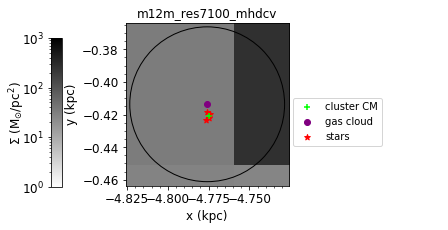

In [54]:
########################
#######################
###GAS INFO ##############
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
xGas=import_gasdata["xGas"]
yGas=import_gasdata["yGas"]    

face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  

####################
####################


fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
ax.set_title(simname)
cluster_count=0
for i in range(len(cluster_data)):                              
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 1) and (rcm <= 12) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        g=ax.scatter(gxcm[gind],gycm[gind],label="cloud",c="purple")
        s=ax.scatter(x,y,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,ycm,label="clusterscm",marker="+",c="lime")
        gcmx=gxcm[gind]
        gcmy=gycm[gind]
        circle=plt.Circle((gxcm[gind][0],gycm[gind][0]),gr90[gind][0],fill=False) #circle for the gas cloud r90
        ax.add_patch(circle)
        print("gxcm:",gxcm[gind])
    cluster_count+=1  

########
########

im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 
    
###########
#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig1.add_axes([-0.03, 0.12, 0.04, 0.69]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig1.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
#######################


print("gxcm1",gcm)
ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("y (kpc)",fontsize=12)       
ax.set_xlim(gcmx-0.05,gcmx+0.05)
ax.set_ylim(gcmy-0.05,gcmy+0.05)
fig1.legend((c,g,s),("cluster CM","gas cloud","stars"),bbox_to_anchor=(1,0.5), loc='center left')
plot_name=simname+"clusters_and_gas_cloud_zoom_in.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()
plt.close()

!!!!!!!!rcm: 6.1243534376319255 False
!!!!!!!!rcm: 4.240180321221868 False
!!!!!!!!rcm: 6.145070852428348 False
!!!!!!!!rcm: 4.794440299727429 True
gind: [128] drmin: 0.024419131152407767
gxcm:        xcm        
------------------
-4.775882051772849
gxcm1        xcm        
------------------
-4.775882051772849


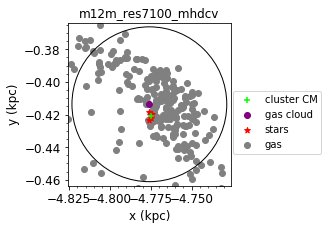

In [58]:
########################
#######################
###GAS INFO ##############
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
#xGas=import_gasdata["xGas"]
#yGas=import_gasdata["yGas"]    

face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  

####################
####################


fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
ax.set_title(simname)
cluster_count=0
for i in range(len(cluster_data)):                              
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 1) and (rcm <= 12) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        gas=ax.scatter(xGas,yGas,c="grey")
        g=ax.scatter(gxcm[gind],gycm[gind],label="cloud",c="purple")
        s=ax.scatter(x,y,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,ycm,label="clusterscm",marker="+",c="lime")
        gcmx=gxcm[gind]
        gcmy=gycm[gind]
        circle=plt.Circle((gxcm[gind][0],gycm[gind][0]),gr90[gind][0],fill=False) #circle for the gas cloud r90
        ax.add_patch(circle)
        print("gxcm:",gxcm[gind])
    cluster_count+=1  

########
########

print("gxcm1",gcm)
ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("y (kpc)",fontsize=12)       
ax.set_xlim(gcmx-0.05,gcmx+0.05)
ax.set_ylim(gcmy-0.05,gcmy+0.05)
ax.axes.set_aspect('equal')

fig1.legend((c,g,s,gas),("cluster CM","gas cloud","stars","gas"),bbox_to_anchor=(0.79,0.5), loc='center left')
plot_name=simname+"clusters_and_gas_cloud_zoom_in_all_gas.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()
plt.close()

!!!!!!!!rcm: 6.1243534376319255 False
!!!!!!!!rcm: 4.240180321221868 False
!!!!!!!!rcm: 6.145070852428348 False
!!!!!!!!rcm: 4.794440299727429 True
gind: [128] drmin: 0.024419131152407767
gzcm:         zcm        
-------------------
0.06904761621033334
gxcm1        xcm        
------------------
-4.775882051772849


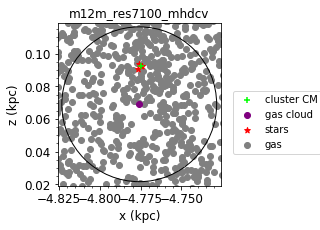

In [60]:
########################
#######################
###GAS INFO ##############
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
xGas=import_gasdata["xGas"]
yGas=import_gasdata["yGas"]    
zGas=import_gasdata["zGas"]


face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  

####################
####################


fig1=plt.figure()
fig1.set_size_inches(4,3)
ax=fig1.add_subplot(1,1,1)
ax.set_title(simname)
cluster_count=0
for i in range(len(cluster_data)):                              
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (rcm>= 1) and (rcm <= 12) and (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        gas=ax.scatter(xGas,zGas,c="grey")
        g=ax.scatter(gxcm[gind],gzcm[gind],label="cloud",c="purple")
        s=ax.scatter(x,z,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,zcm,label="clusterscm",marker="+",c="lime")
        gcmx=gxcm[gind]
        gcmy=gycm[gind]
        gcmz=gzcm[gind]
        circle=plt.Circle((gxcm[gind][0],gzcm[gind][0]),gr90[gind][0],fill=False) #circle for the gas cloud r90
        ax.add_patch(circle)
        print("gzcm:",gzcm[gind])
    cluster_count+=1  

########
########

print("gxcm1",gcmx)
ax.minorticks_on()
ax.tick_params(labelsize=12)
ax.set_xlabel("x (kpc)",fontsize=12)
ax.set_ylabel("z (kpc)",fontsize=12)       
ax.set_xlim(gcmx-0.05,gcmx+0.05)
ax.set_ylim(gcmz-0.05,gcmz+0.05)
ax.axes.set_aspect('equal')

fig1.legend((c,g,s,gas),("cluster CM","gas cloud","stars","gas"),bbox_to_anchor=(0.79,0.5), loc='center left')
plot_name=simname+"x_z_clusters_and_gas_cloud_zoom_in_all_gas.png"
fig1.savefig(plot_path+plot_name,bbox_inches='tight',dpi=200)
plt.show()
plt.close()

!!!!!!!!rcm: 6.1243534376319255 False
!!!!!!!!rcm: 4.240180321221868 False
!!!!!!!!rcm: 6.145070852428348 False
!!!!!!!!rcm: 4.794440299727429 True
gind: [128] drmin: 0.024419131152407767
This is the gas cloud gxcm: -4.775882051772849
Making animation


<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

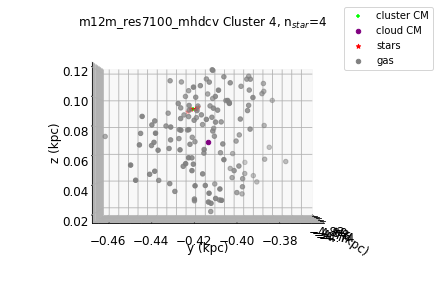

<Figure size 432x288 with 0 Axes>

In [5]:
#%matplotlib notebook
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

v=import_gasdata["v"]
face=import_gasdata["face"]
xGas=import_gasdata["xGas"]
yGas=import_gasdata["yGas"]    
zGas=import_gasdata["zGas"] 

face=import_gasdata["face"]
xh=import_gasdata["xh"]
yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
  
cluster_count=0
for i in range(len(cluster_data)):                              
    fig1=plt.figure()
    fig1.set_size_inches(7,5)
    ax=fig1.add_subplot(111,projection='3d')
    ax.set_title(simname+" Cluster "+str(cluster_count+1)+r", n$_{star}$="+str(cluster_data[cluster_count+1]["no_of_star"]))
    xcm=cluster_data[cluster_count+1]["xcm"]
    ycm=cluster_data[cluster_count+1]["ycm"]
    zcm=cluster_data[cluster_count+1]["zcm"]
    x=cluster_data[cluster_count+1]["x"]
    y=cluster_data[cluster_count+1]["y"]
    z=cluster_data[cluster_count+1]["z"]
    rcm=(xcm**2+ycm**2+zcm**2)**(1/2)
    embedded_check=cluster_data[cluster_count+1]["is_embedded"]
    print("!!!!!!!!rcm:",rcm,embedded_check)
    if (embedded_check == True):
        gind, drmin = distance_functions.closest_cluster_index(xcm, ycm, zcm, gxcm, gycm, gzcm)
        print("gind:",gind,"drmin:",drmin)
        #print(i,sxcm[i], sycm[i], gxcm[gind][0], gycm[gind][0])
        xlim=gxcm[gind][0]
        ylim=gycm[gind][0]
        zlim=gzcm[gind][0]
        r90=gr90[gind][0]
        gas_box=np.where(((xGas-xlim)**2+(yGas-ylim)**2+(zGas-zlim)**2)**(1/2)<(r90+0.1*r90))
        gas=ax.scatter(xGas[gas_box],yGas[gas_box],zGas[gas_box],c="grey")
        g=ax.scatter(gxcm[gind],gycm[gind],gzcm[gind],label="cloud",c="purple")
        s=ax.scatter(x,y,z,label="stars",marker="*",c="red")
        c=ax.scatter(xcm,ycm,zcm,label="clusterscm",marker="+",c="lime")
        print("This is the gas cloud gxcm:",gxcm[gind][0])
        #circle=plt.Circle((xlim,ylim),r90,fill=False,color="blue")
        #ax.add_patch(circle)
        ax.minorticks_on()
        ax.tick_params(labelsize=12)
        ax.set_xlabel("x (kpc)",fontsize=12)
        ax.set_ylabel("y (kpc)",fontsize=12)  
        ax.set_zlabel("z (kpc)",fontsize=12)
        
        lim=r90+0.1*r90
        ax.set_xlim(xlim-lim,xlim+lim)
        ax.set_ylim(ylim-lim,ylim+lim)
        ax.set_zlim(zlim-lim,zlim+lim)
        #ax.axes.set_aspect('equal')
        ax.legend((c,g,s,gas), ("cluster CM","cloud CM","stars","gas"),bbox_to_anchor=(0.85,1.03), loc='upper left')
        plot_name=simname+"_cluster_"+str(cluster_count+1)+"_and_gas_cloud_zoom_in_xyz"
        def rotate(angle):
            ax.view_init(elev=0,azim=angle)

        print("Making animation")
        rot_animation = animation.FuncAnimation(fig1, rotate, frames=np.arange(0, 362, 2), interval=100)
        rot_animation.save(plot_path+plot_name+".gif", dpi=80, writer='imagemagick')
        #fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
        plt.show()
        plt.tight_layout()
    fig1.clf()
    #break
    cluster_count+=1

KeyError: 'age'

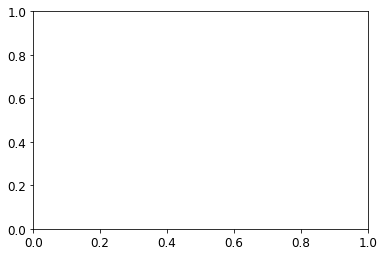

In [6]:
#%matplotlib notebook
gas_datapath="./"+simtype+"_gas_data_pkl/"
file_name=simtype+"_gas_data"+str(snap)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
    import_gasdata = pickle.load(input)

cluster_count=0
for i in range(len(cluster_data)):                              
    fig1=plt.figure()
    #fig1.set_size_inches(7,5)
    ax2=fig1.add_subplot(111)
    
    age=cluster_data[cluster_count+1]["age"]
    print(age)
    plot_name="age_histogram"+simname+"_cluster_"+str(cluster_count+1)
    n,bins,edges=ax2.hist(age,bins=3,ec="red",alpha=0.5)
    print(n)
    print(bins)
    ax2.set_xlabel("Age (Myr) ",fontsize=12)
    ax2.set_ylabel("No. of Stars",fontsize=12)  
    ax2.set_title("Cluster "+str(cluster_count+1))
    plt.xticks(bins)
    fig1.savefig(plot_path+plot_name+".png",bbox_inches='tight',dpi=200)
    plt.show()
    plt.tight_layout()
    fig1.clf()
    #break
    cluster_count+=1